# ASSIGNMENT 1: Iris Data Classification (Using TensorFlow)

# Section 1: Reading Data
This section carefully dives into the dataset by analyzing key aspects such as data count and types, uniquness, duplication, and null values.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

I will start by converting the csv file for smooth visualization and data analtyical purposes. This will form basis for choosing the suitable model based on the data's nature.

In [ ]:
df= pd.read_csv('/content/iris.csv')
df.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Observation: Firstly, I start with a simple visual of the data by printing the first 5 records. This is helpful as it shows the type of variety and range of data values.

In [ ]:
df.tail()

,sepal_l,sepal_w,petal_l,petal_w,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Observation: Additionally, printing the last 5 records helps supplement further simple and initial visualization.

In [ ]:
#Shape (rows by columns)
df.shape

(150, 5)

Observation:
The dataset consists of 150 rows (entries or records) and 5 columns (features).

In [ ]:
#Description of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Observation:
The dataset consists of "float" datatypes in all of its input variables (columns), except for the output variable which is of data type "object".

In [ ]:
#checking for missing values
df.isnull().sum()

,0
sepal_l,0
sepal_w,0
petal_l,0
petal_w,0
species,0


Observation: The dataset does not consist of any missing values.

In [ ]:
#Checking for duplicates
df.duplicated().sum()

1

Observation: The dataset consists of a single duplicated row, which will be handelled in the following segment.

In [ ]:
#Handle duplication
df = df.drop_duplicates()

In [ ]:
#checking for duplicates (post handlling)
df.duplicated().sum()

0

Observation: Huzzah! No more duplicates!

In [ ]:
#identifying garbage values
for i in df.select_dtypes(include='object'):
  print(df[i].value_counts())
  print("***"*10)


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
Name: count, dtype: int64
******************************


Observation: The dataset does not consist of any garbage values.

# Section 2: Explartory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a process of analyzing and summarizing a data set in order to understand the underlying structure and relationships within the data. EDA is an important step in the data science process, as it allows you to identify patterns, trends, and anomalies in the data that may not be immediately apparent.

In [ ]:
#Descriptive statistics for numerical columns
df.describe(include='all').round(2)

,sepal_l,sepal_w,petal_l,petal_w,species
count,149.00,149.00,149.00,149.00,149
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.06,3.75,1.19,NaN
std,0.83,0.44,1.77,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.30,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


Observation: In this section, I started by printing the statistical information of all the columns, and round the output values by 2 to ensure clean printing.

In [ ]:
#Descriptive statistics for object column "Species"
df.describe(include='object')

,species
count,149
unique,3
top,Iris-setosa
freq,50


Observation: The species, aka the output column consists of three unique categories. They're almost all equal in frequncy (except for that one duplicate I removed earlier), yet the top (most frequent) is randomly selected as setosa.

**Graph 1: Pair Plot of Iris Dataset**

Text(0.5, 1.02, 'Pair Plot of Iris Dataset')

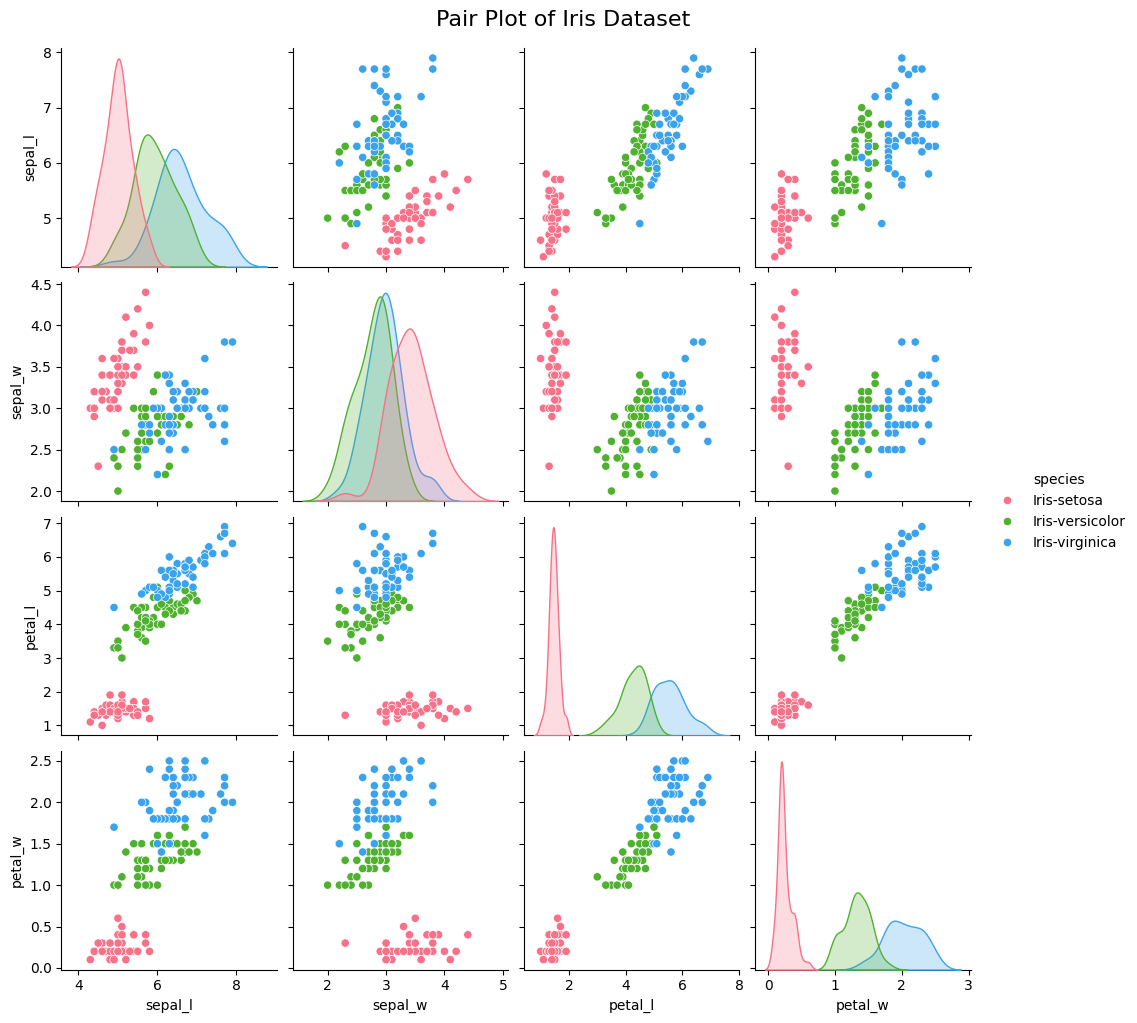

In [ ]:
pairplot= sns.pairplot(df, hue='species', height=2.5, palette='husl');
pairplot.fig.suptitle('Pair Plot of Iris Dataset', y=1.02, fontsize=16)
# visualize the relationships between pairs of variables in a dataset

Observation: The pair plot is mainly used to compare the relationship between each pair of variables within the dataset. This provides useful insights such as a clear strong seperation relationship between petal length and petal width.
Furthermore, we can also observe charachterstics regarding the three sepcieses; like how Setosas have shorter petal length and width compared to Virginica and Versicolor, which constrastly have wider petal lengths and widths.

**Graph 2: Histogram visualization for numerical variable distribution**

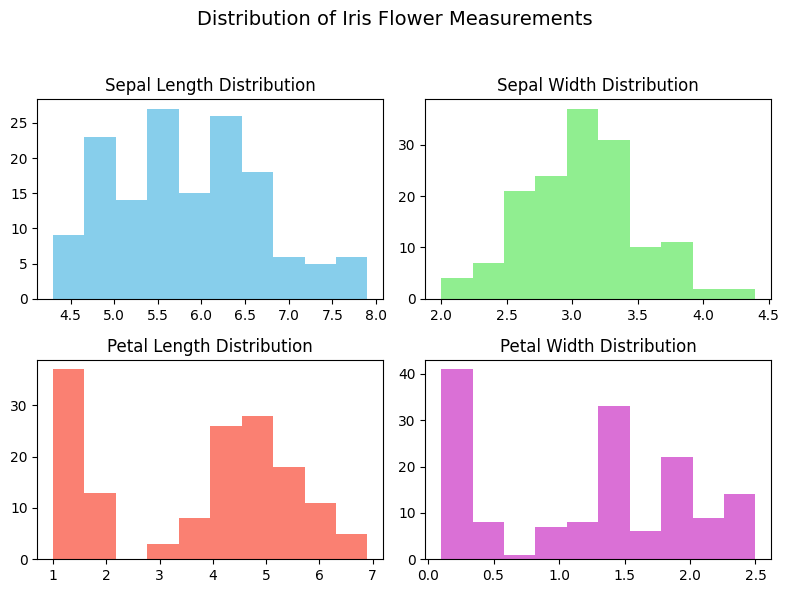

In [ ]:
from os import defpath
# Chart - Histogram visualization for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots with specified colors
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['sepal_l'], color='skyblue')
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['sepal_w'], color='lightgreen')
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['petal_l'], color='salmon')
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['petal_w'], color='orchid')
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()


Observation:
Sepal length seems to be roughly symmetric with no visible skewness, Sepal width is approximetly left skewed, and both Petal length and width are seemingly right skewed. Setosa has small petal dimensions (as plotted previously in graph 1), which could jusitfy the skenewss of the graphs. Furthermore, Virginica and Versicolor tend to have larger petal dimensions compared to Setosas justifying the long petal width and length (the right tails).

**Graph 3: Correlation Matrix heatmap**

In [ ]:
#compute the correlation matrix for all numerical columns in the DataFrame
corr=df.select_dtypes(include='number').corr()

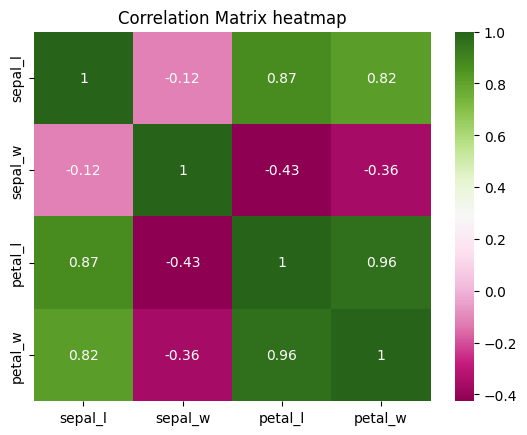

In [ ]:
#Correlation with heatmap to interpert relations and multicolliniarity
sns.heatmap(corr,annot=True, cmap='PiYG')
plt.title('Correlation Matrix heatmap')
plt.show()

Observation: The graph above demonstrates the correlation between each pair of variables. It can be inferred that petal width and petal length have the highest positive correlation of 0.96. Additionally, petal length and sepal length has a bit lower, but still relatively high positive correlation of 0.87. In terms of negative correlations, the results are not as high as the positive ones, as the highest score is formed by sepal width and petal length of -0.43.

**Graph 4: Boxplot per column**

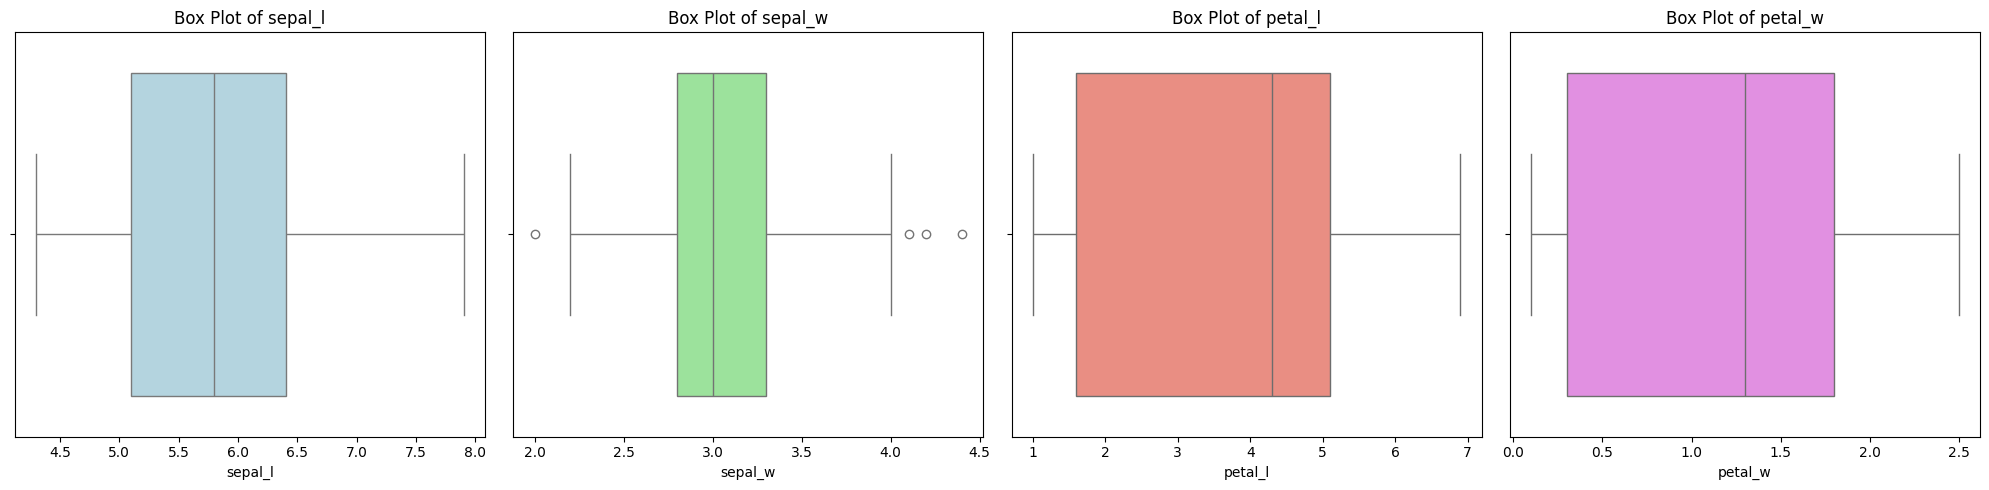

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['lightblue', 'lightgreen', 'salmon', 'violet']
# Create a figure with subplots
num_columns = len(df.select_dtypes(include='number').columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 5))

# Loop through each numerical column to create box plots side-by-side
for idx, (col, color) in enumerate(zip(df.select_dtypes(include='number').columns, colors)):
    sns.boxplot(data=df, x=col, ax=axes[idx], color=color)
    axes[idx].set_title(f'Box Plot of {col}')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


Observation: By graphing the boxplot for each column, it paves a path for easily and quickly detecting outliers within each column.
There lies some outliers in Sepal width (sepal_w) column.
One on the left side, below the lower whisker, and three on the right side above the upper whisker.
They are identified as outliers because they are data points that fall outside the range of 1.5 times the interquartile range (IQR) from the lower and upper quartiles.

In [ ]:
import pandas as pd

# Example DataFrame `df`
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


Observation: In this part, IQR (inter quartile range) has been utilized to detect the exact outliers visualized in the previous boxplots for removal. Since the outlier data points were a small number, it is best to remove them.

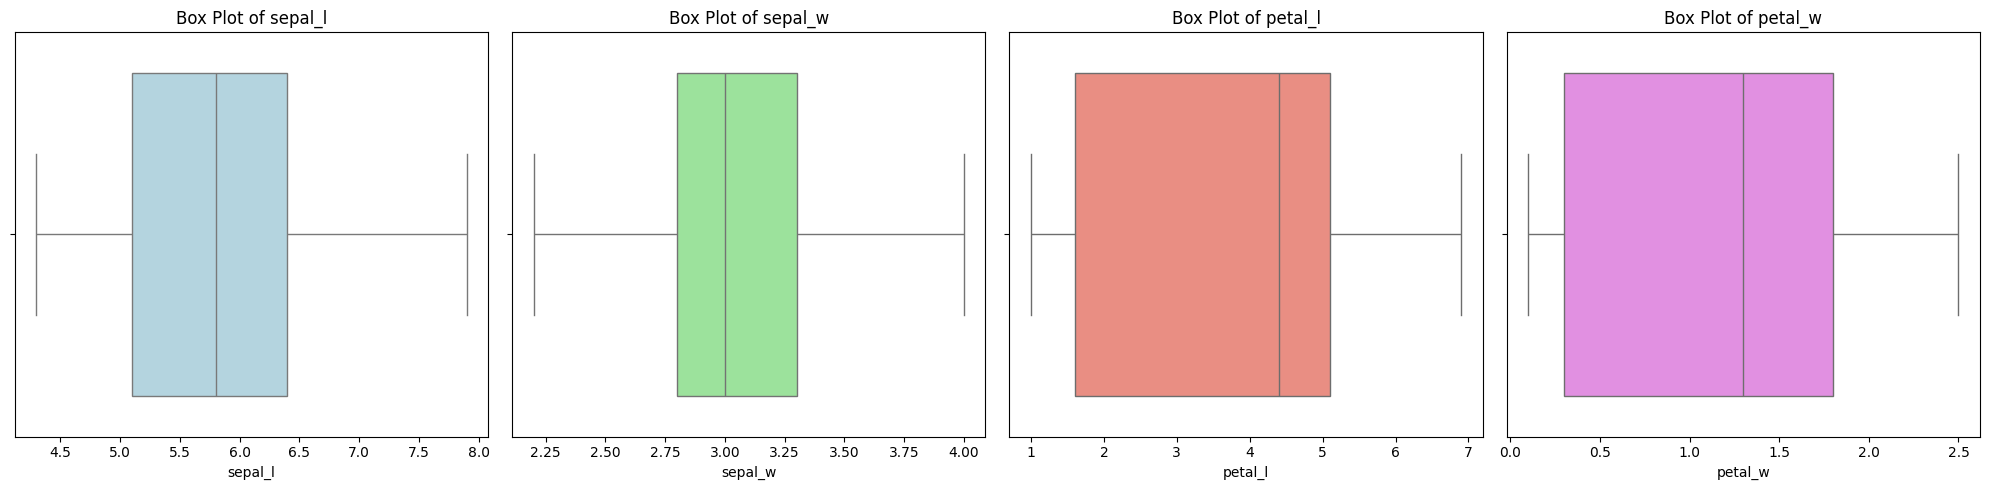

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['lightblue', 'lightgreen', 'salmon', 'violet']
# Create a figure with subplots
num_columns = len(df.select_dtypes(include='number').columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 5))

# Loop through each numerical column to create box plots side-by-side
for idx, (col, color) in enumerate(zip(df.select_dtypes(include='number').columns, colors)):
    sns.boxplot(data=df, x=col, ax=axes[idx], color=color)
    axes[idx].set_title(f'Box Plot of {col}')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


Observation: No remaning outliers.

# Section 3: Feature Scaling and Splitting
In this section, pre-processing data begins by scaling features and splitting them into testing and training sets.

In [ ]:
#Defining the input variables
x= df.drop('species', axis=1)
x.head()


,sepal_l,sepal_w,petal_l,petal_w
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In this code snippet, I specified the input variables in a newly defined datadframe and dropped the species column, which is the label column to be classified.

In [ ]:
#Visualizing the species column and datatype
df['species']

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
#one hot encode the classification label
y = pd.get_dummies(df['species']).astype(int)
y.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Since neural networks do not understand textual data I used one-hot enconding which is a technique that converts text data to numerical representations.

In [ ]:
#Convert it to numpy array for processing
y=y.to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the features using Min-Max scaling // to minimze the range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x) # converts it to a numpy array by default

In [ ]:
print("Shape of X",X_scaled.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X_scaled[:3])
print("Examples of y\n",y[:3])

Shape of X (145, 4)
Shape of y (145, 3)
Examples of X
 [[0.22222222 0.72222222 0.06779661 0.04166667]
 [0.16666667 0.44444444 0.06779661 0.04166667]
 [0.11111111 0.55555556 0.05084746 0.04166667]]
Examples of y
 [[1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) #initializing random state is for ensuring the same split across every run

In the past section, I split the data into training and testing by seperating the class labels from the features. Additionally, I one-hot encoded the class labels for model understanding of the classes and normalized the values of the features using min-max normalization, as well as converted both class labels and features to a numpy array instead of a dataframe. Finally, I specified the ratio of training and testing using the pre-processed data.

# Section 4: Model Development
After preparing and visualizing the data, we have formed a clear & erorr-safe guide to develop our model.

In [ ]:
from tensorflow import keras
#Neural network module
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout, BatchNormalization

In [ ]:
model=Sequential() #Sequntial model
model.add(Dense(1000,input_dim=4,activation='relu')) #Dense is a fully connected layer, with 4 inputs and relu activation function
model.add(Dense(500,activation='relu')) #Hidden layer 1: 500 neurons and relu as an activation function
model.add(Dense(300,activation='relu')) #Hidden layer 2: 300 neurons and relu as an activation function
model.add(Dropout(0.2))#Ignoring 20 percent of the neurons to prevent overfitting
model.add(Dense(3,activation='softmax'))#Output layer with 3 neurons (3 classes) using softmax for multi-classification
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Loss function is categorical cross entropy suitable for classfication problems

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 1000)                │           5,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 3)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 656,703 (2.51 MB)

 Trainable params: 656,703 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping()
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.5407 - loss: 1.0390 - val_accuracy: 0.7500 - val_loss: 0.7532
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5872 - loss: 0.7665 - val_accuracy: 0.7500 - val_loss: 0.4866
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6082 - loss: 0.5703 - val_accuracy: 0.5909 - val_loss: 0.5186
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7180 - loss: 0.4973 - val_accuracy: 0.5909 - val_loss: 0.4726
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7048 - loss: 0.4746 - val_accuracy: 0.9091 - val_loss: 0.3524
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8548 - loss: 0.4272 - val_accuracy: 0.9318 - val_loss: 0.2806
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8505 - loss: 0.3861 - val_accuracy: 0.9091 - val_loss: 0.2376
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8402 - loss: 0.3352 - val_accuracy: 0.9091 - val_loss: 0.2383

For the selection of number of epochs, I started small using only 10 epochs and the batch size was selected 20 as the dataset is relatively small. In terms of the output, it can be inferred that the loss function in unseen data has gotten to 0.11 and it fit the training data by getting the loss value down to 0.14 which is a great improvement.

In [ ]:
prediction=model.predict(x_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100
print("Accuracy of the dataset",accuracy )

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Accuracy of the dataset 97.72727272727273


Furtherly, I calculated the accuracy of the model and it has reached 97%.

Finally, after buidling and developing the model using the appropirate activiation function namely ReLu (Rectified Linear Unit) that is used to preform non-linear calculations. As it was seen earlier, -in the pairplots above- the iris dataset is not fully linear as some classes form an overlap such as versicolor and viriginica. Moreover, since it is a multi-class classification problem, it is perferable to use softmax activiation function within the output layer as it calculates the membership probability for each class. Further justifying the choice of categorical class entropy loss function as it deals with probabilities as well ensureing efficient training by minimizing the difference between predicted and true probabilities.
As for the number of nodes, it was purley selected based on previous work of developers referenced by the end of this notebook, as their efforts were utilized to grant some direction into developing and building the model.

# Section 5: Reflection and Future work

This assignment has helped me learn the basics of analyzing and understanding the behavior of the data. It enabled me to explore and truly understand data analysis tools in the EDA section. Furtherly, in terms of building a model, it allowed me to venture into the practical settings of understanding the deep learning aspects. As the course contains no lab content, this was helpful to fully grasp the theoritcal material and solidify my understanding of the course. Additionally, it was enjoyable to progress and slowly build upon every step, explore and appreciate the previous works of developers, and conjoin all this newfound knowledge into applying my own contribution to a widely discussed problem.

---
There lies some room for improvement. As my code is relatively simple, I understand that there are many more ways to develop the model differently that could yield different results. As the methods reflected in this notebook are deemed optimal by my own personal experience, there are various tweaks and fixes such as increasing the epoch size, utilize early-stopping for computional resource perservation and prevent overfitting. Even though, there has been attempts to utilize early stopping, it granted a lower accuracy which could be due to pre-mature stopping. I believe that using hyperparamater tuning could potentially solve this problem and grant higher accuracy results.


# Refernces:
https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/
https://www.kaggle.com/code/junyingzhang2018/classification-on-iris-data
https://youtu.be/qXDiaGdlb5E?si=fMygALYXRu4IjJvh
https://youtu.be/GP-2634exqA?si=PIfAdTGRjSacWpsG
https://www.youtube.com/watch?v=2CFqGUA-KQA
https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
https://www.kaggle.com/code/louisong97/neural-network-approach-to-iris-dataset
https://medium.com/@saitejamummadi/creating-a-simple-neural-network-to-classify-iris-species-using-pytorch-45586f45c9e